In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airline_data = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 1)

In [3]:
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
x = airline_data.drop(["ID#","Award?"],axis = 1)
y = airline_data['Award?']

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [6]:
x.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [7]:
x = x.drop(["Qual_miles"],axis = 1)

In [8]:
for col in x.select_dtypes(include='int'):
    unique_count = x[col].nunique()
    total_count = len(airline_data[col])
    if unique_count / total_count < 0.09:
        print(f"{col} is likely categorical ({unique_count} unique values out of {total_count})")
    else:
        print(f"{col} is likely NOT categorical ({unique_count} unique values out of {total_count})")

Balance is likely NOT categorical (3904 unique values out of 3999)
cc1_miles is likely categorical (5 unique values out of 3999)
cc2_miles is likely categorical (3 unique values out of 3999)
cc3_miles is likely categorical (5 unique values out of 3999)
Bonus_miles is likely NOT categorical (2734 unique values out of 3999)
Bonus_trans is likely categorical (57 unique values out of 3999)
Flight_miles_12mo is likely categorical (343 unique values out of 3999)
Flight_trans_12 is likely categorical (35 unique values out of 3999)
Days_since_enroll is likely NOT categorical (2820 unique values out of 3999)


In [9]:
cols = ["cc1_miles", "cc2_miles", "cc3_miles"]
x[cols] = x[cols].astype('category')

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Balance            3999 non-null   int64   
 1   cc1_miles          3999 non-null   category
 2   cc2_miles          3999 non-null   category
 3   cc3_miles          3999 non-null   category
 4   Bonus_miles        3999 non-null   int64   
 5   Bonus_trans        3999 non-null   int64   
 6   Flight_miles_12mo  3999 non-null   int64   
 7   Flight_trans_12    3999 non-null   int64   
 8   Days_since_enroll  3999 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 199.8 KB


In [11]:
col = x.select_dtypes(include='int').columns
col

Index(['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll'],
      dtype='object')

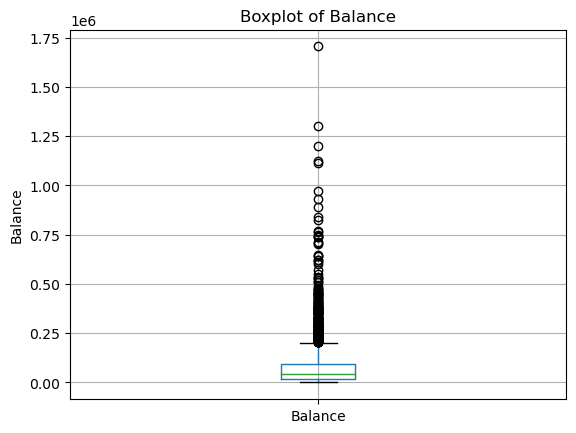

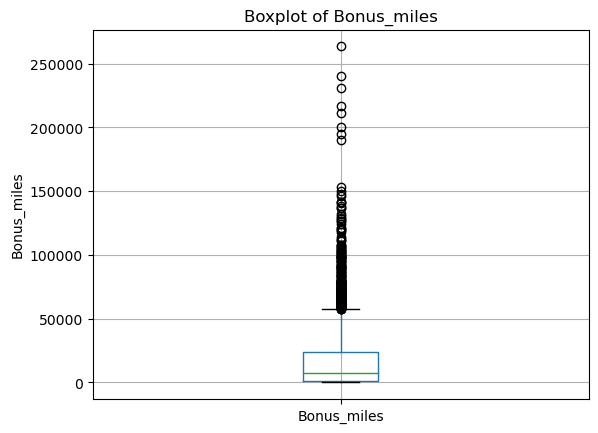

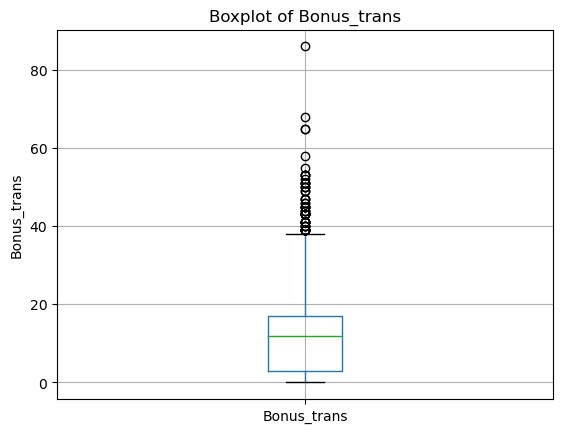

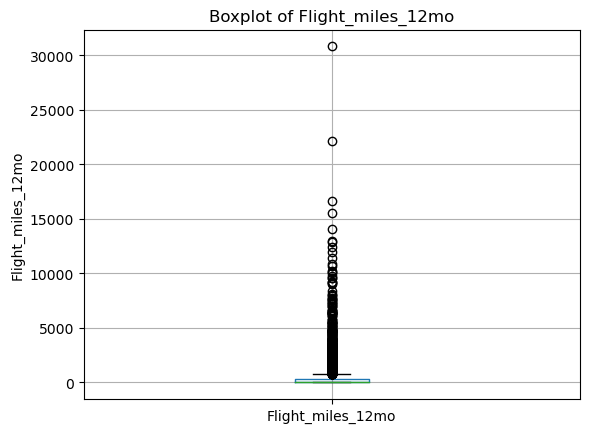

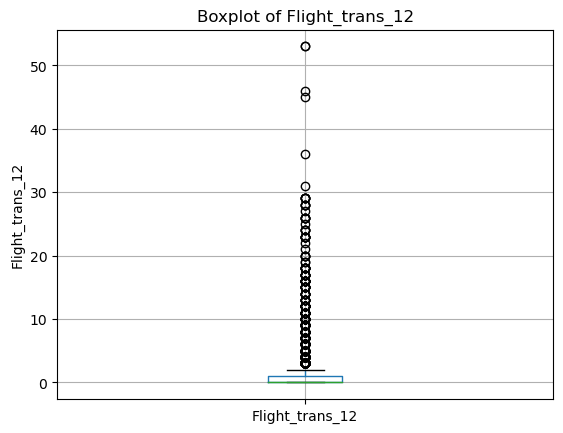

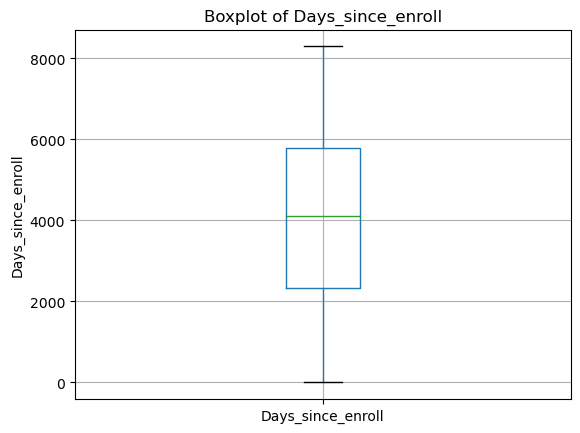

In [12]:
for cols in col:
    plt.title(f'Boxplot of {cols}')
    x.boxplot(column = [cols])
    plt.ylabel(cols)
    plt.show()

In [13]:
x.isnull().sum()

Balance              0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [14]:
outlier_counts = {}

for column in x.select_dtypes(include='number').columns:
    Q1 = x[column].quantile(0.25)
    Q3 = x[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = x[(x[column] < lower) | (x[column] > upper)].shape[0]
    outlier_counts[column] = outlier_count

# Print result
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Balance: 266 outliers
Bonus_miles: 280 outliers
Bonus_trans: 63 outliers
Flight_miles_12mo: 569 outliers
Flight_trans_12: 565 outliers
Days_since_enroll: 0 outliers


In [15]:
def winsorize_iqr(data):
    numeric_cols = data.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        data[col] = data[col].clip(lower, upper)

    return data

In [16]:
x = winsorize_iqr(x)

In [17]:
x

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,1,1,1,174.0,1.0,0.0,0.0,7000
1,19244.0,1,1,1,215.0,2.0,0.0,0.0,6968
2,41354.0,1,1,1,4123.0,4.0,0.0,0.0,7034
3,14776.0,1,1,1,500.0,1.0,0.0,0.0,6952
4,97752.0,4,1,1,43300.0,26.0,777.5,2.5,6935
...,...,...,...,...,...,...,...,...,...
3994,18476.0,1,1,1,8525.0,4.0,200.0,1.0,1403
3995,64385.0,1,1,1,981.0,5.0,0.0,0.0,1395
3996,73597.0,3,1,1,25447.0,8.0,0.0,0.0,1402
3997,54899.0,1,1,1,500.0,1.0,500.0,1.0,1401


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Balance            3999 non-null   float64 
 1   cc1_miles          3999 non-null   category
 2   cc2_miles          3999 non-null   category
 3   cc3_miles          3999 non-null   category
 4   Bonus_miles        3999 non-null   float64 
 5   Bonus_trans        3999 non-null   float64 
 6   Flight_miles_12mo  3999 non-null   float64 
 7   Flight_trans_12    3999 non-null   float64 
 8   Days_since_enroll  3999 non-null   int64   
dtypes: category(3), float64(5), int64(1)
memory usage: 199.8 KB


In [19]:
col = x.select_dtypes(include= ['float','int']).columns
col

Index(['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll'],
      dtype='object')

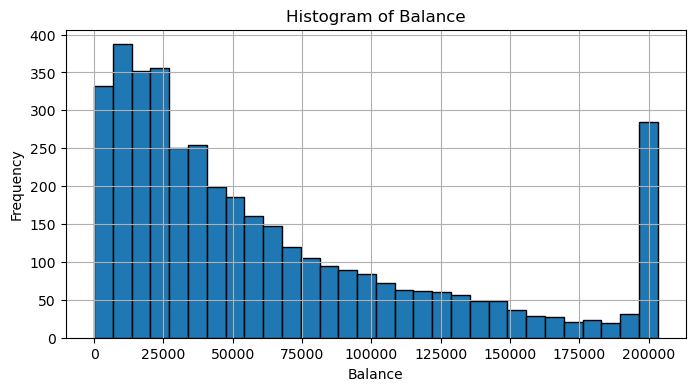

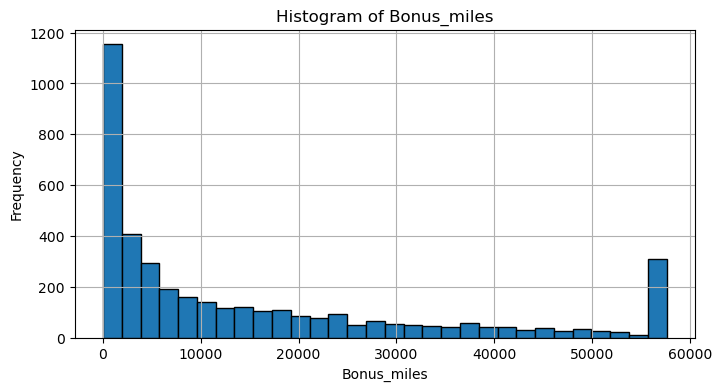

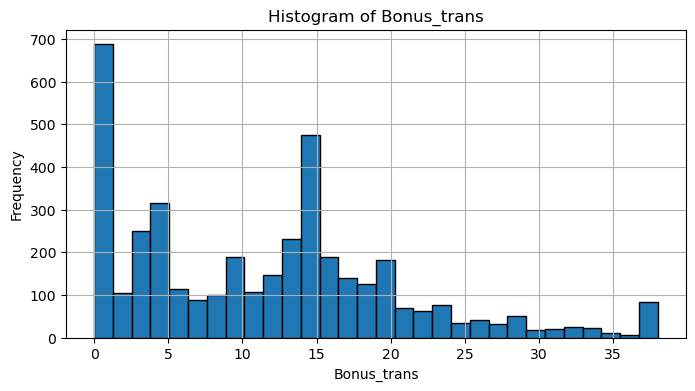

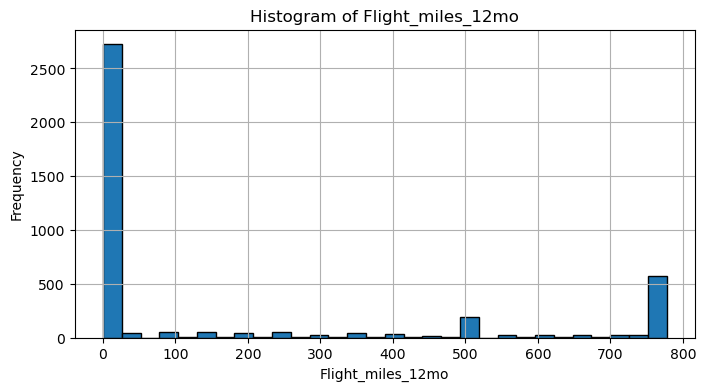

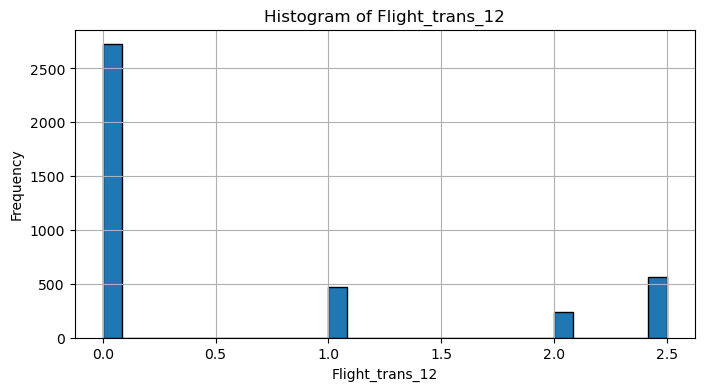

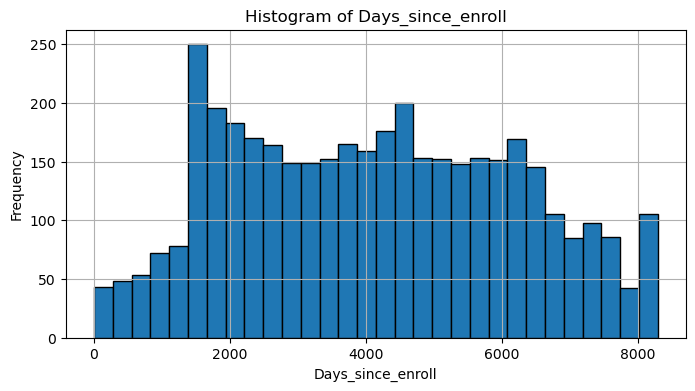

In [20]:
for cols in col:
    plt.figure(figsize=(8, 4))
    plt.hist(x[cols], bins=30, edgecolor='black')
    plt.title(f'Histogram of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [21]:
data = pd.concat([x,y],axis = 1)

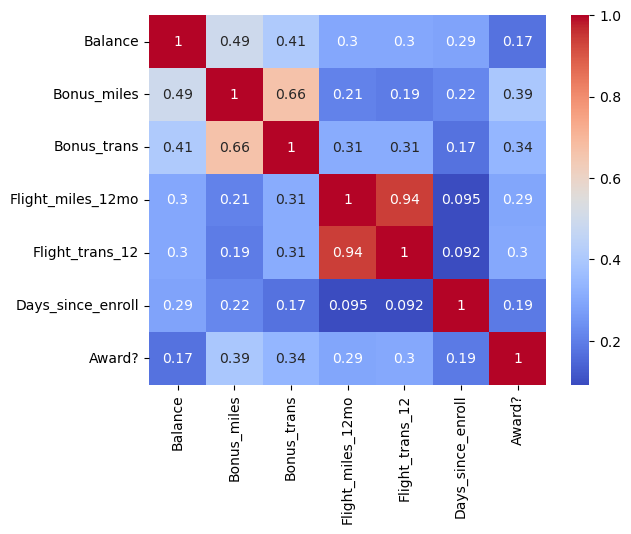

In [22]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
x = x.drop(["Balance","Days_since_enroll"],axis = 1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

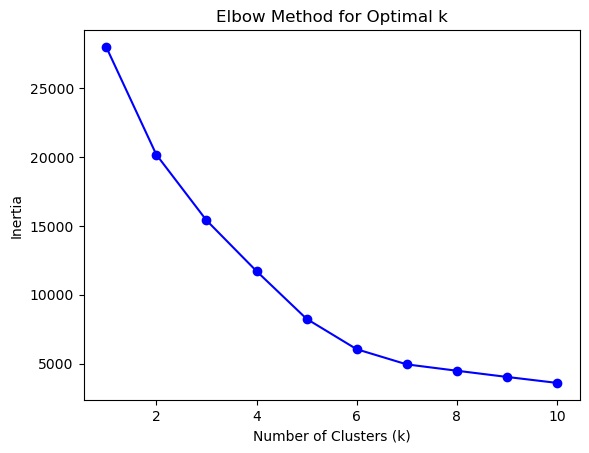

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


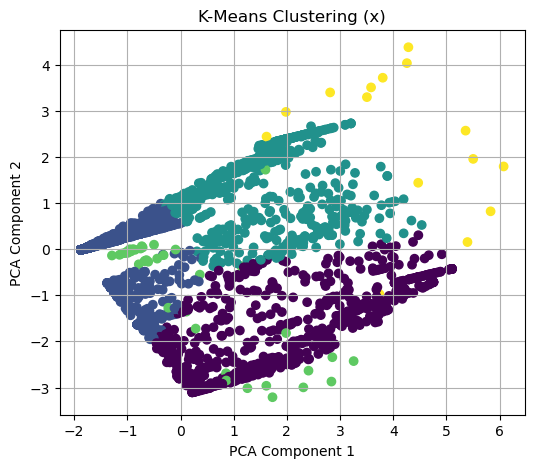

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

# 2. Apply PCA to reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# 3. Visualize the clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering (x)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

for method in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(x)
    print(f"{method}: Silhouette Score = {silhouette_score(x, labels):.2f}")


ward: Silhouette Score = 0.42
complete: Silhouette Score = 0.71
average: Silhouette Score = 0.71
single: Silhouette Score = 0.62


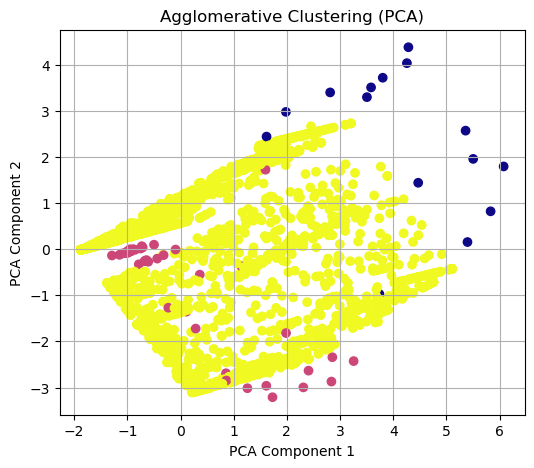

In [28]:
# Fit Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
agg_labels = agg.fit_predict(x)


# PCA to reduce to 2D
pca = PCA(n_components=5)
X_pca = pca.fit_transform(x)

# Plot Agglomerative Clustering results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='plasma')
plt.title("Agglomerative Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [29]:
from sklearn.cluster import DBSCAN


for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 7]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(x)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps={eps}, min_samples={min_samples} → clusters: {n_clusters}")


eps=0.3, min_samples=3 → clusters: 64
eps=0.3, min_samples=5 → clusters: 37
eps=0.3, min_samples=7 → clusters: 30
eps=0.5, min_samples=3 → clusters: 40
eps=0.5, min_samples=5 → clusters: 26
eps=0.5, min_samples=7 → clusters: 22
eps=0.7, min_samples=3 → clusters: 22
eps=0.7, min_samples=5 → clusters: 17
eps=0.7, min_samples=7 → clusters: 17


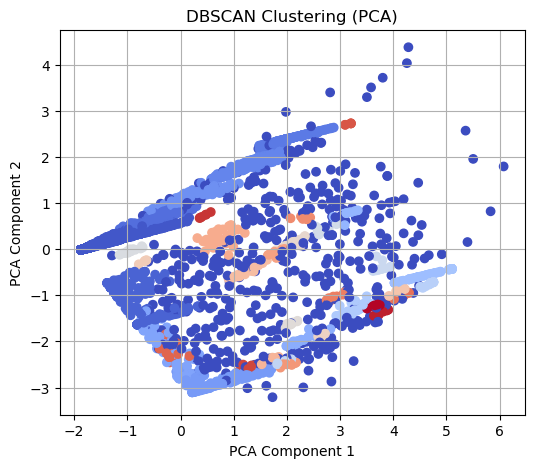

In [30]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5
               )
dbscan_labels = dbscan.fit_predict(x)
 
# PCA for 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Plot DBSCAN results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.4796648644786912

In [32]:
silhouette_score(x, dbscan_labels)

0.2719765535067013

## Findings

## Data Preprocessing

- we removed ID col since it has no meaning in the machine. Also removed qual_miles since 75% of its data is of 0's. Also removed Balance and Days_since_enroll since there is no much correlation with the target variable

- we found outliers and done winsorize_iqr process

### - Kmeans 
  - Group similar points to cluster ny iteratively assigning points to the nearest cluster centre(centroid)
  
  - with the help of elbow method we found the optimized cluster number and done the kmeans and got the silhoute    score of 0.47
  
  
### - Algomerative clustering

  - Agglomerative clustering is a type of hierarchical clustering that begins by treating each item as its own individual cluster. It then repeatedly merges the most similar pairs of clusters until all items are grouped together in a single, overall cluster.
  
### - DB scan (Density based spatial clustering of App with noise)

  - DBSCAN is similar to clustering methods like K-Means, but it's more effective for datasets with outliers or irregular shapes. Unlike K-Means, which needs you to predefine the number of clusters, DBSCAN groups points based on density, allowing it to automatically find clusters of any shape and ignore noise or outliers.